In [59]:
import numpy as np
import pandas as pd

In [32]:
data = pd.read_csv('Social Media Ad Data.csv')

In [33]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [34]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Text(0, 0.5, 'Group')

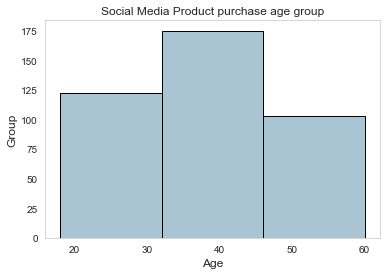

In [17]:
fig, ax = plt.subplots()
data["Age"].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False, bins=3)
ax.set_title('Social Media Product purchase age group', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Group', fontsize=12)

In [35]:
group_names = ["Young", "MiddleAged", "Old"]
data["Age_binned"] = pd.cut(data["Age"], 3, labels = group_names)
data[["Age","Age_binned"]].tail()

,Age,Age_binned
395,46,MiddleAged
396,51,Old
397,50,Old
398,36,MiddleAged
399,49,Old


In [36]:
data[["Age","Age_binned"]].head()

,Age,Age_binned
0,19,Young
1,35,MiddleAged
2,26,Young
3,27,Young
4,19,Young


In [37]:
data = data.drop(['Age'], axis=1)

Text(0, 0.5, 'Group')

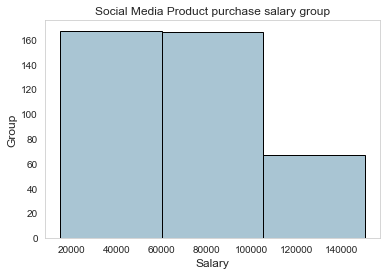

In [38]:
fig, ax = plt.subplots()
data["EstimatedSalary"].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False, bins=3)
ax.set_title('Social Media Product purchase salary group', fontsize=12)
ax.set_xlabel('Salary', fontsize=12)
ax.set_ylabel('Group', fontsize=12)

In [39]:
group_names = ["Low", "Medium", "High"]
data["EstimatedSalary_binned"] = pd.cut(data["EstimatedSalary"], 3, labels = group_names)
data[["EstimatedSalary","EstimatedSalary_binned"]].tail()

,EstimatedSalary,EstimatedSalary_binned
395,41000,Low
396,23000,Low
397,20000,Low
398,33000,Low
399,36000,Low


In [40]:
data[["EstimatedSalary","EstimatedSalary_binned"]].head(10)

,EstimatedSalary,EstimatedSalary_binned
0,19000,Low
1,20000,Low
2,43000,Low
3,57000,Low
4,76000,Medium
5,58000,Low
6,84000,Medium
7,150000,High
8,33000,Low
9,65000,Medium


In [41]:
data = data.drop(['EstimatedSalary'], axis=1)

In [43]:
data.head(10)

,User ID,Gender,Purchased,Age_binned,EstimatedSalary_binned
0,15624510,Male,0,Young,Low
1,15810944,Male,0,MiddleAged,Low
2,15668575,Female,0,Young,Low
3,15603246,Female,0,Young,Low
4,15804002,Male,0,Young,Medium
5,15728773,Male,0,Young,Low
6,15598044,Female,0,Young,Medium
7,15694829,Female,1,Young,High
8,15600575,Male,0,Young,Low
9,15727311,Female,0,MiddleAged,Medium


In [44]:
data['Gender'].replace('Female', 0,inplace=True)
data['Gender'].replace('Male', 1, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['Age_binned'] = labelencoder.fit_transform(data['Age_binned']) #fitting and transforming the desired categorical column.
data.head()

,User ID,Gender,Purchased,Age_binned,EstimatedSalary_binned
0,15624510,1,0,2,Low
1,15810944,1,0,0,Low
2,15668575,0,0,2,Low
3,15603246,0,0,2,Low
4,15804002,1,0,2,Medium


In [46]:
data['EstimatedSalary_binned'] = labelencoder.fit_transform(data['EstimatedSalary_binned']) #fitting and transforming the desired categorical column.
data.head()

,User ID,Gender,Purchased,Age_binned,EstimatedSalary_binned
0,15624510,1,0,2,1
1,15810944,1,0,0,1
2,15668575,0,0,2,1
3,15603246,0,0,2,1
4,15804002,1,0,2,2


In [47]:
feature_cols = ["Gender", "Age_binned", "EstimatedSalary_binned"]
X = data[feature_cols]
y = data.Purchased

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62 10]
 [11 37]]


In [54]:
accuracy_score(y_test, y_pred)

0.825

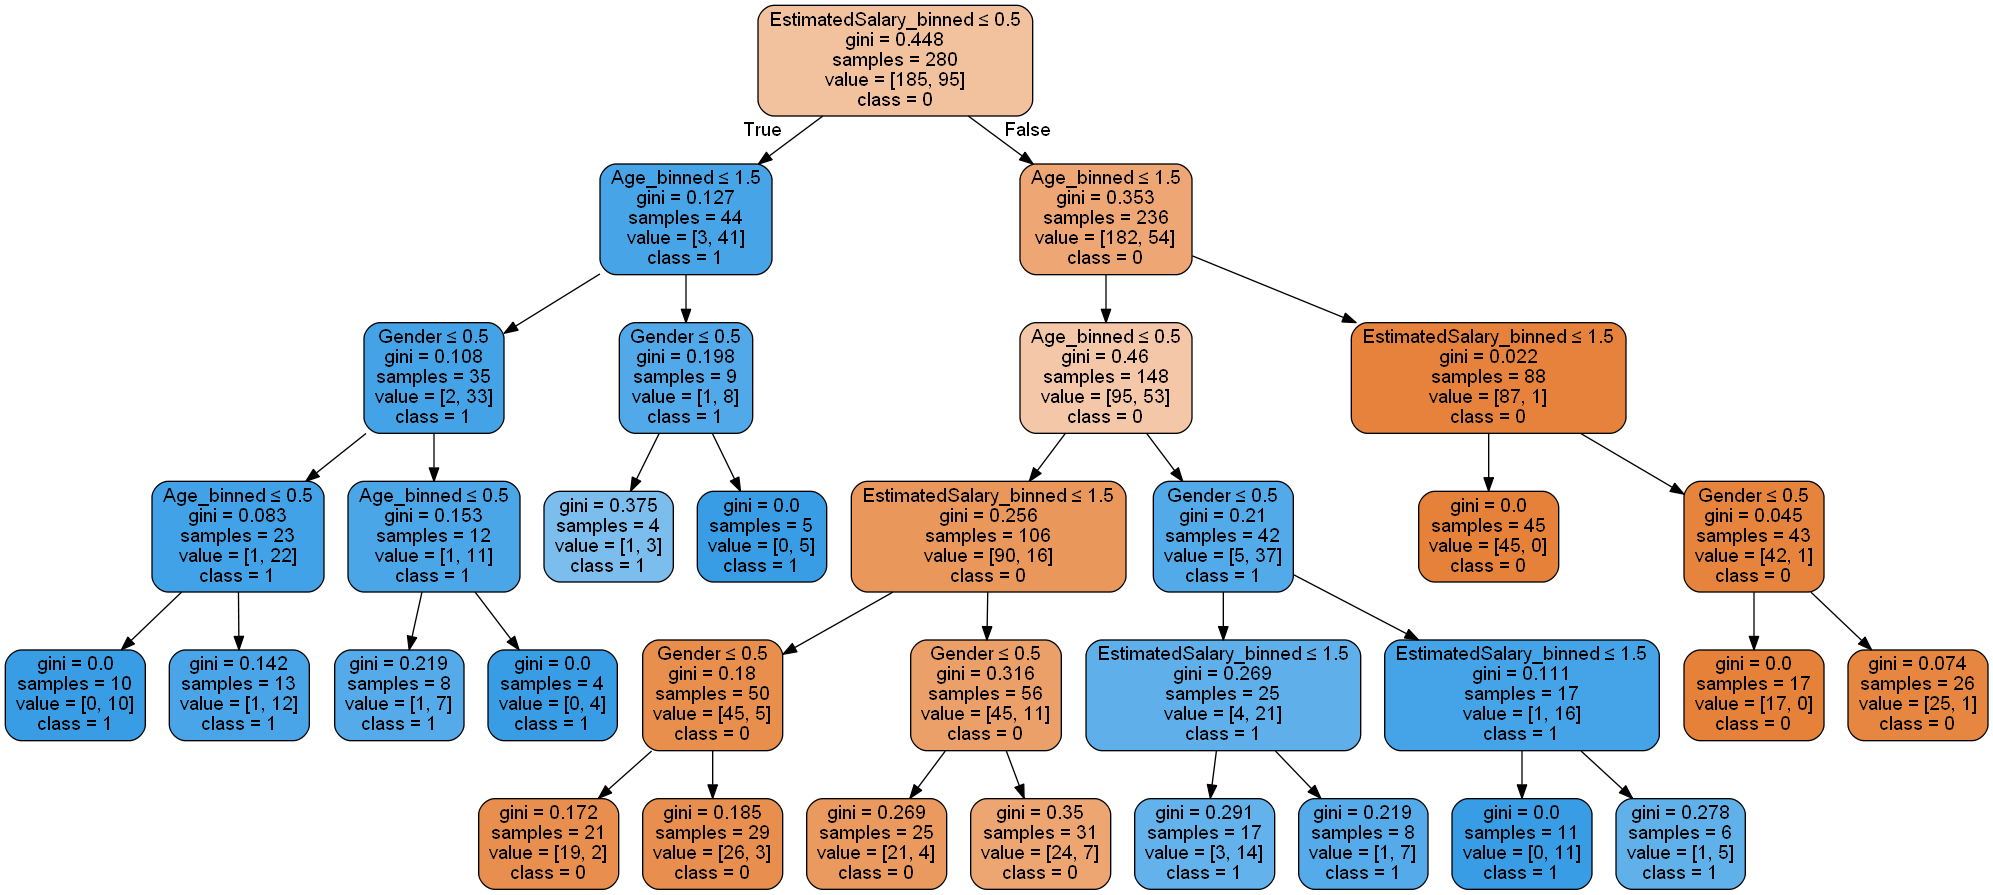

In [66]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus
dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('purchase_pred.png')
Image(graph.create_png())